In [2]:
import os
import os.path as op
import shutil

import mne
from mne import read_evokeds

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

#https://mne.tools/stable/overview/implementation.html

In [3]:
#dataPath = 'C:/Users/juhoffmann/Desktop/EEG_BIDS/EEG_250Hz/PreprocData/'
subjects = glob.glob('/Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/*.edf') 

#Analysis settings
tmin = -0.2
tmax = 0.8
baseline = (-0.2, 0)

montage = mne.channels.read_custom_montage('/Volumes/EMOCON/data_EEG/BC-MR-64.bvef') #set montage 
subjects

['/Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-004_BackwardMask_Preprocessed.edf',
 '/Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-006_BackwardMask_Preprocessed.edf',
 '/Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-010_BackwardMask_Preprocessed.edf',
 '/Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-011_BackwardMask_Preprocessed.edf',
 '/Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-014_BackwardMask_Preprocessed.edf',
 '/Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-015_BackwardMask_Preprocessed.edf',
 '/Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-017_BackwardMask_Preprocessed.edf',
 '/Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-019_BackwardMask_Preprocessed.edf',
 '/Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-021_BackwardMask_Preprocessed.edf',
 '/Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-022_BackwardMask_Preprocessed.edf',
 '/Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-024_BackwardMask_Preprocessed.edf',
 '/Volumes/EMOCON/dat

In [4]:
len(subjects)

51

In [5]:
target_congruent_strong = []
target_congruent_weak = []
target_incongruent_strong = []
target_incongruent_weak = []


for i in subjects:

    # Load Dataset
    eeg = mne.io.read_raw_edf(i, preload = True)
    eeg.set_channel_types(mapping={'ECG': 'ecg'}) #define ECG channel 
    #montage.plot() 
    eeg.set_montage(montage, match_case=False) #set montage to raw dataset
    
    #Find events
    events, event_id = mne.events_from_annotations(eeg)
    
    #Define epochs
    epochs = mne.Epochs(eeg, events,
                        event_id = event_id,
                        preload = True,
                        tmin= tmin, 
                        tmax= tmax, 
                        event_repeated='merge',
                        baseline = baseline) #set baseline from -0.2s to - 0 seconds
    
    
    evoked_target_congruent_strong = epochs['h_h_strong','n_n_strong','s_s_strong'].average()
    evoked_target_congruent_weak = epochs['h_h_weak','n_n_weak','s_s_weak'].average()
    evoked_target_incongruent_strong = epochs['h_n_strong','h_s_strong','n_h_strong','n_s_strong','s_h_strong','s_n_strong'].average()
    evoked_target_incongruent_weak = epochs['h_n_weak','h_s_weak','n_h_weak','n_s_weak','s_h_weak','s_n_weak'].average()
    
    #append all evokeds  
    
    target_congruent_strong.append(evoked_target_congruent_strong)
    target_congruent_weak.append(evoked_target_congruent_weak)
    target_incongruent_strong.append(evoked_target_incongruent_strong)
    target_incongruent_weak.append(evoked_target_incongruent_weak)
    
    del eeg  # reduce memory usage

Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-004_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 126749  =      0.000 ...   506.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
814 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 814 events and 251 original time points ...


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1938 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-006_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131999  =      0.000 ...   527.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
777 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 777 events and 251 original time points ...


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1827 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


3 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-010_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 81374  =      0.000 ...   325.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'TPEAK', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_s_strong', 'h_s_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
221 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 221 events and 251 original time points ...
1 bad epochs dropped
Extracting EDF parameters from

/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1454 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TPEAK', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
639 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 639 events and 251 original time points ...
2 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-014_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1795 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 125624  =      0.000 ...   502.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
732 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 732 events and 251 original time points ...
2 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-015_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info s

/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1845 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
770 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 770 events and 251 original time points ...
2 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-017_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1839 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133124  =      0.000 ...   532.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
801 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 801 events and 251 original time points ...


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1854 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-019_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 129749  =      0.000 ...   518.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'TPEAK', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
751 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 751 events and 251 original time points ...
7 bad epochs

/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1869 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'TPEAK', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
464 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 464 events and 251 original time points ...
5 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-022_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134249  =      0.000 ...   536.996 secs...


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1683 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
838 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 838 events and 251 original time points ...


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1970 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


4 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-024_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 129374  =      0.000 ...   517.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TPEAK', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
731 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 731 events and 251 original time points ...
1 bad epochs dropped

/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1850 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132749  =      0.000 ...   530.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
771 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 771 events and 251 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-027_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1955 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133124  =      0.000 ...   532.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
826 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 826 events and 251 original time points ...
3 bad epochs dropped


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1986 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-031_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134999  =      0.000 ...   539.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 30', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
808 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 808 events and 251 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/

/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1885 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 122999  =      0.000 ...   491.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 30', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
714 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 714 events and 251 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-033_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1846 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134624  =      0.000 ...   538.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 30', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'TPEAK', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
815 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 815 events and 251 original time points ...
2 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-034_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1905 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131999  =      0.000 ...   527.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
774 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 774 events and 251 original time points ...
2 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-041_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1905 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134249  =      0.000 ...   536.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
758 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 758 events and 251 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-043_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1937 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132374  =      0.000 ...   529.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
709 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 709 events and 251 original time points ...
4 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-045_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1820 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134999  =      0.000 ...   539.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
922 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 922 events and 251 original time points ...


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 2088 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-046_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132749  =      0.000 ...   530.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
818 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 818 events and 251 original time points ...
2 bad epochs dropped
Extracting EDF par

/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 2033 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133124  =      0.000 ...   532.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'TPEAK', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
808 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 808 events and 251 original time points ...
2 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-051_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 2060 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133874  =      0.000 ...   535.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
741 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 741 events and 251 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-052_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1853 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132749  =      0.000 ...   530.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
804 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 804 events and 251 original time points ...
2 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-053_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1935 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 122999  =      0.000 ...   491.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'TPEAK', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
714 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 714 events and 251 original time points ...
2 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-054_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1876 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134624  =      0.000 ...   538.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'TPEAK', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
852 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 852 events and 251 original time points ...
2 bad epochs dropped


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1938 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-056_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 124499  =      0.000 ...   497.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
747 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 747 events and 251 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /Volumes

/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1775 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133124  =      0.000 ...   532.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
784 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 784 events and 251 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-059_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1936 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131624  =      0.000 ...   526.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TPEAK', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
779 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 779 events and 251 original time points ...
2 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-062_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1933 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133124  =      0.000 ...   532.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'TPEAK', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
769 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 769 events and 251 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-068_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1887 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 117749  =      0.000 ...   470.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
683 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 683 events and 251 original time points ...
6 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-069_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creat

/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1630 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
593 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 593 events and 251 original time points ...
2 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-070_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1724 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Creating raw.info structure...
Reading 0 ... 134249  =      0.000 ...   536.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'TPEAK', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
823 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 823 events and 251 original time points ...
1 bad epochs dropped


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1968 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-071_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 130499  =      0.000 ...   521.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'TPEAK', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
776 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 776 events and 251 original time points ...
1 bad epochs dropped
Extracting EDF paramet

/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1881 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
695 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 695 events and 251 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-074_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131999  =      0.000 ...   527.996 secs...


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1857 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TPEAK', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
779 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 779 events and 251 original time points ...
3 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-078_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1941 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 126374  =      0.000 ...   505.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
778 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 778 events and 251 original time points ...
2 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-079_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1830 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132374  =      0.000 ...   529.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'TPEAK', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
776 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 776 events and 251 original time points ...
2 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-083_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1890 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131249  =      0.000 ...   524.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'TPEAK', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
738 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 738 events and 251 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-085_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1842 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 106874  =      0.000 ...   427.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
558 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 558 events and 251 original time points ...
5 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-086_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structur

/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1408 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
790 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 790 events and 251 original time points ...
4 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-088_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1890 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 89624  =      0.000 ...   358.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
547 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 547 events and 251 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-089_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creati

/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1282 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
628 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 628 events and 251 original time points ...
5 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-090_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133874  =      0.000 ...   535.496 secs...


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1778 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'TPEAK', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
706 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 706 events and 251 original time points ...
2 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-091_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1759 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134999  =      0.000 ...   539.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'TPEAK', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
742 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 742 events and 251 original time points ...
2 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-093_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1765 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 123374  =      0.000 ...   493.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
732 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 732 events and 251 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-096_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure.

/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1803 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'TPEAK', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
789 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 789 events and 251 original time points ...
4 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-101_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1866 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 130499  =      0.000 ...   521.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
773 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 773 events and 251 original time points ...
3 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-103_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creat

/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1976 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
727 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 727 events and 251 original time points ...
3 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-105_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1811 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131624  =      0.000 ...   526.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
791 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 791 events and 251 original time points ...
1 bad epochs dropped
Extracting EDF parameters from /Volumes/EMOCON/data_EEG/EEG_250Hz/edf/Lennard/sub-018_BackwardMask_Preprocessed.edf...
EDF file detected


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 2000 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97124  =      0.000 ...   388.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
410 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 410 events and 251 original time points ...
3 bad epochs dropped


/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:10: RuntimeWarning: Omitted 1655 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
/var/folders/q1/lc_1tjbn0hg4h4txldk1g2lm0000gn/T/ipykernel_1936/1955387475.py:13: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


In [6]:
average_target_congruent_strong = mne.combine_evoked(target_congruent_strong, weights = 'equal')
average_target_congruent_weak = mne.combine_evoked(target_congruent_weak, weights = 'equal')
average_target_incongruent_strong = mne.combine_evoked(target_incongruent_strong, weights = 'equal')
average_target_incongruent_weak = mne.combine_evoked(target_incongruent_weak, weights = 'equal')

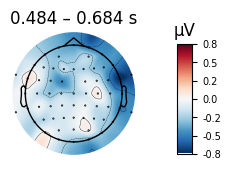

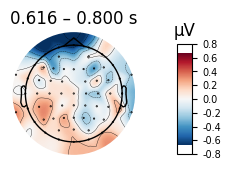

In [30]:
# emotion congruent 

fig1 = average_target_congruent_strong.plot_topomap(times = [0.584], average = 0.205)
fig2 = average_target_congruent_weak.plot_topomap(times = [0.72], average = 0.21)

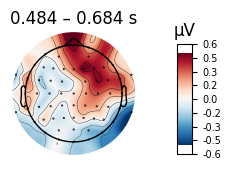

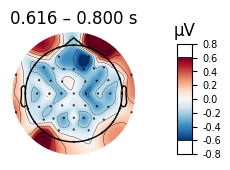

In [32]:
# emotion incongruent 

fig3 = average_target_incongruent_strong.plot_topomap(times = [0.584], average = 0.205)
fig4 = average_target_incongruent_weak.plot_topomap(times = [0.72], average = 0.21)